<a href="https://www.kaggle.com/code/lazyrook/eda-binary-classification-comparison-77?scriptVersionId=130885149" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1. Installing and Importing Libraries

1. Pandas: Pandas is a widely-used library for data manipulation and analysis. It offers tools for reading and writing data, cleaning and transforming data, and performing exploratory data analysis.

2. NumPy: NumPy is a fundamental package for scientific computing with Python. It provides support for multi-dimensional arrays and matrices, as well as a large library of mathematical functions.

3. Matplotlib: Matplotlib is a plotting library for Python. It provides a wide range of visualization options, including line plots, scatter plots, bar plots, and histograms.

4. Seaborn: Seaborn is a higher-level interface to Matplotlib that simplifies the creation of statistical graphics. It provides a range of visualization types, including heat maps, pair plots, and regression plots.

5. Scikit-learn: Scikit-learn is a machine learning library that includes tools for data preprocessing, feature selection, and model selection. It also includes tools for visualization, such as scatter plots, line plots, and confusion matrices.

6. Plotly: Plotly is a web-based visualization library that provides interactive charts and dashboards. It offers support for a wide range of visualization types, including scatter plots, bar charts, box plots, and choropleth maps.


In [1]:
#!pip install pandas numpy matplotlib seaborn scikit-learn plotly 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Load the dataset

In [3]:
df_raw = pd.read_csv("/kaggle/input/smoking-dataset-from-uk/smoking.csv")

In [4]:
df_raw.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [5]:
df_raw.shape

(1691, 13)

## 3. Preprocessing
- Drop unnecessary Columns
- Treat missing values

#### Let's drop the first column

In [6]:
# assume `df_raw` is your DataFrame
df = df_raw.drop('Unnamed: 0', axis=1)


In [7]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [8]:
df.shape

(1691, 12)

In [9]:
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

- Shape of my df: (1691, 12)
- Columns in the df: 'gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'

In [10]:
print(df.isnull().sum())


gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64


In [11]:
# Select rows where `smoke` is `'No'`
no_smoke_rows = df.loc[df['smoke'] == 'No']

# Set `amt_weekends` and `amt_weekdays` to `0` for those rows
df.loc[no_smoke_rows.index, ['amt_weekends', 'amt_weekdays']] = 0

In [12]:
# Replace NaN values in the `type` column with 'Non-Smoker' for non-smokers
no_smoke_rows = df.loc[df['smoke'] == 'No']
df.loc[no_smoke_rows.index, 'type'] = 'Non-Smoker'

In [13]:
print(df.isnull().sum())


gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64


We've cleaned our dataset. Now, moving on to the visualizations

## 4. Visualizations

### 4.1 Univariate Analysis

- Categorical variables: 'gender', 'marital_status', 'highest_qualification', 'nationality', 'ethnicity', 'region', 'smoke', 'type', 'gross_income'
- Numeric variables: 'age', 'amt_weekends', 'amt_weekdays'

In [14]:
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

In [15]:
df.describe()


,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,1691.000000
mean,49.836192,4.085748,3.423418
std,18.736851,8.643517,7.568341
min,16.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000
50%,48.000000,0.000000,0.000000
75%,65.500000,0.000000,0.000000
max,97.000000,60.000000,55.000000


<AxesSubplot: >

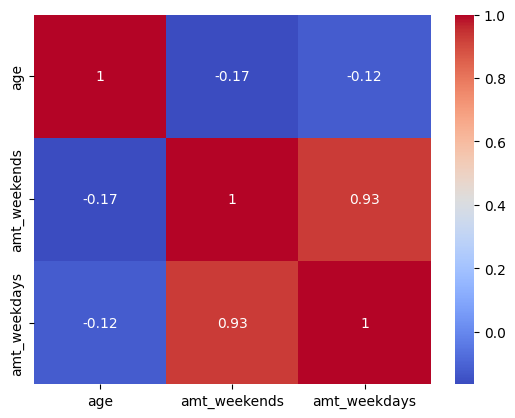

In [16]:
# Selecting the numerical columns
numerical_columns = ['age', 'amt_weekends', 'amt_weekdays']

# Calculating the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### 4.1.1 Gender(Categorical)

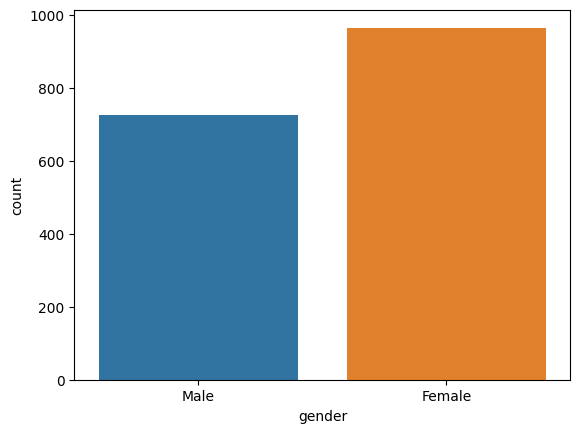

In [17]:
# Plot the distribution of the `gender` column
sns.countplot(x='gender', data=df)
plt.show()


#### 4.1.2 Marital Status

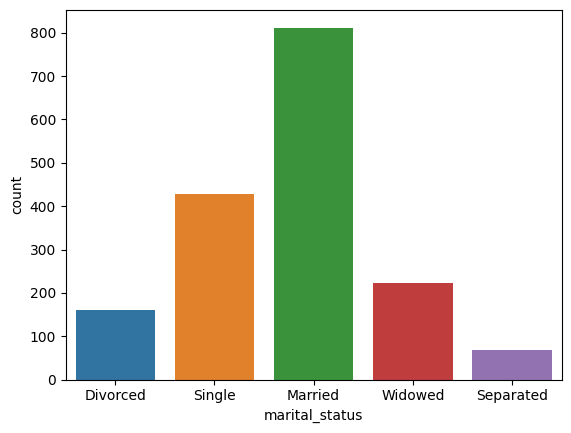

In [18]:
sns.countplot(x='marital_status', data=df)
plt.show()

#### 4.1.3 Highest Qualification

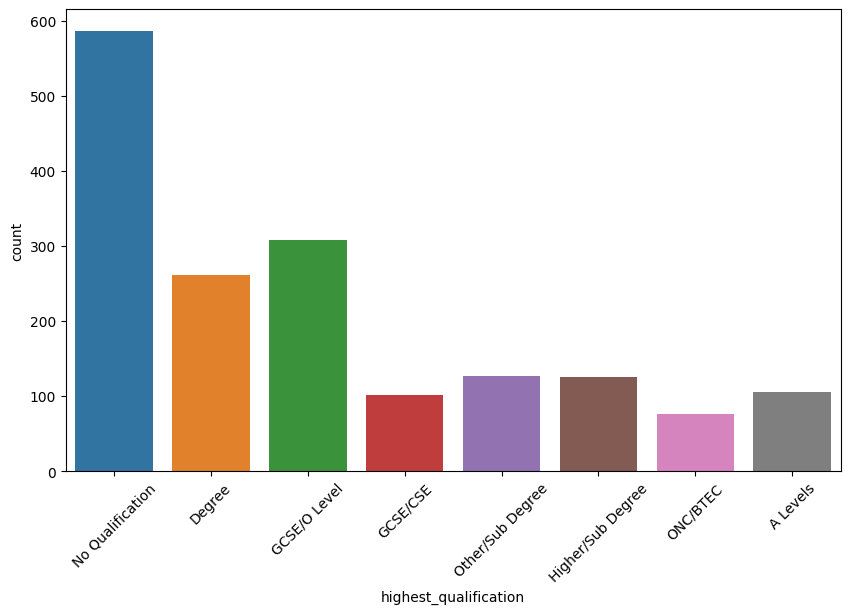

In [19]:
plt.figure(figsize=(10,6))  # set the size of the plot
sns.countplot(x='highest_qualification', data=df)
plt.xticks(rotation=45)   # rotate the x-axis labels by 45 degrees
plt.show()

#### 4.1.4 Nationality

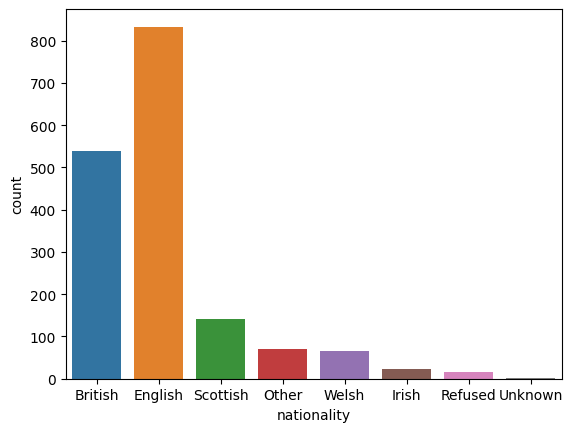

In [20]:
sns.countplot(x='nationality', data=df)
plt.show()

#### 4.1.5 Ethnicity

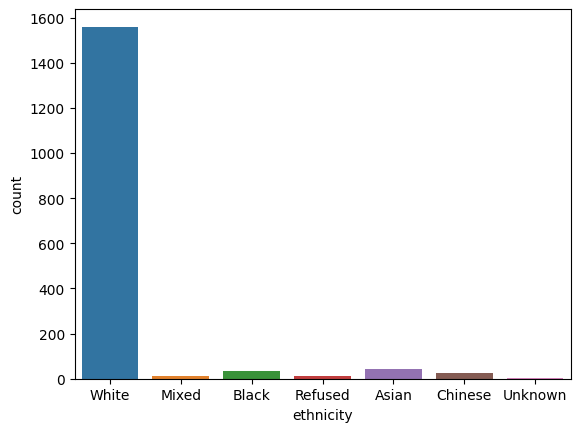

In [21]:
sns.countplot(x='ethnicity', data=df)
plt.show()

#### 4.1.6 Region

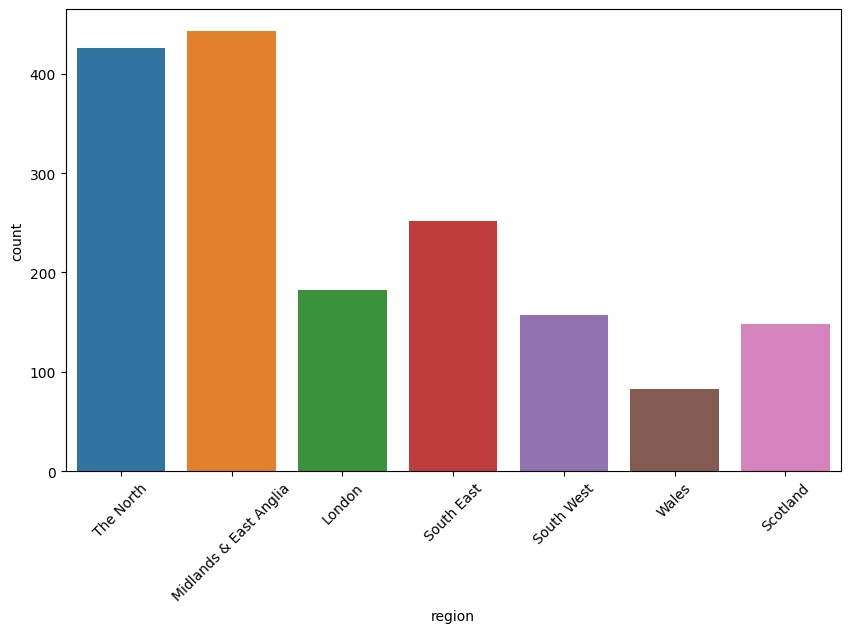

In [22]:
plt.figure(figsize=(10,6))  # set the size of the plot
sns.countplot(x='region', data=df)
plt.xticks(rotation=45)   # rotate the x-axis labels by 45 degrees
plt.show()

#### 4.1.7 Smoke

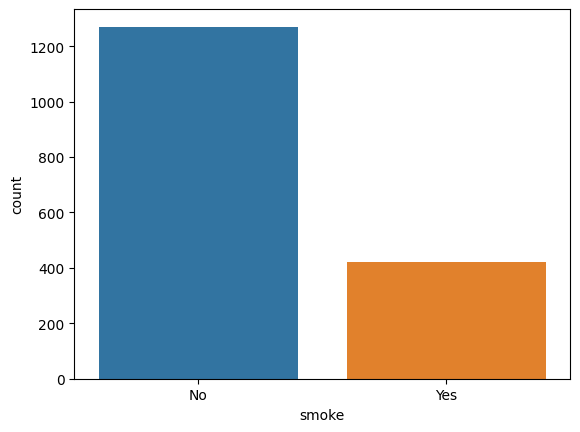

In [23]:
sns.countplot(x='smoke', data=df)
plt.show()

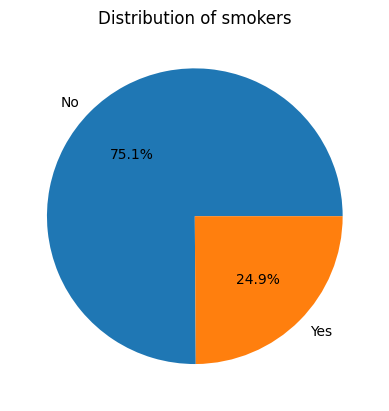

In [24]:
# Count the number of occurrences for each value in the 'type' column
type_counts = df['smoke'].value_counts()

# Create a pie chart
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of smokers')
plt.show()

#### 4.1.8 Type

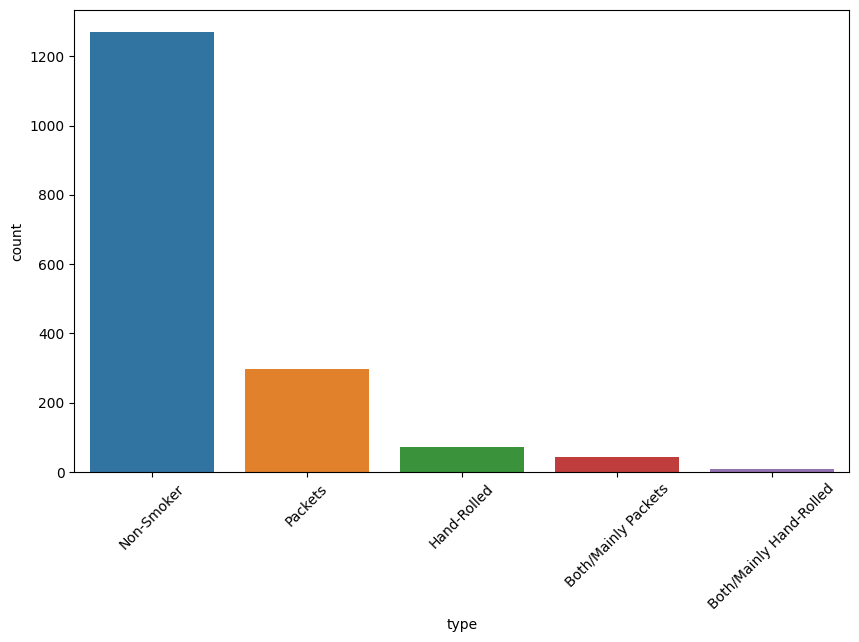

In [25]:
plt.figure(figsize=(10,6))  # set the size of the plot
sns.countplot(x='type', data=df)
plt.xticks(rotation=45)   # rotate the x-axis labels by 45 degrees
plt.show()

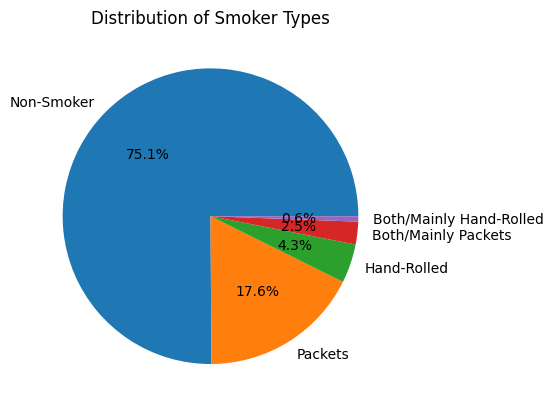

In [26]:
# Count the number of occurrences for each value in the 'type' column
type_counts = df['type'].value_counts()

# Create a pie chart
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smoker Types')
plt.show()

#### 4.1.9 Gross Income (Categorical)

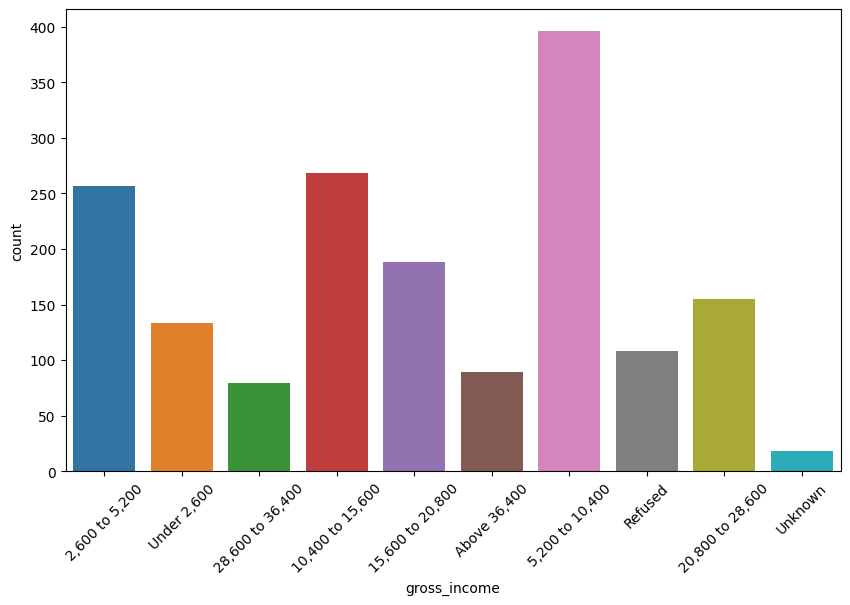

In [27]:
plt.figure(figsize=(10,6))  # set the size of the plot
sns.countplot(x='gross_income', data=df)
plt.xticks(rotation=45)   # rotate the x-axis labels by 45 degrees
plt.show()

#### 4.1.10 Age (Numerical variable)

<AxesSubplot: xlabel='age', ylabel='Count'>

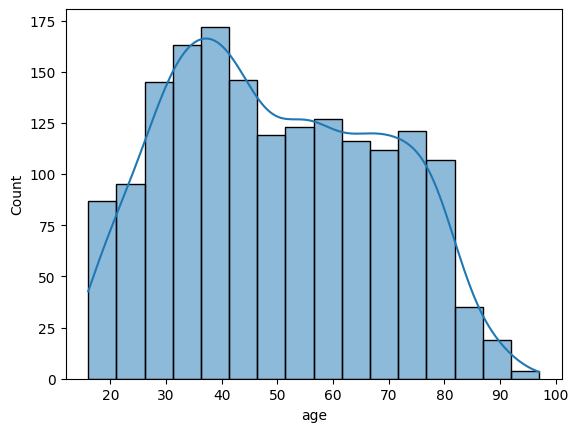

In [28]:
sns.histplot(data=df, x="age", kde=True)

#### 4.1.11 Amount consumed over weekends

<AxesSubplot: xlabel='amt_weekends', ylabel='Count'>

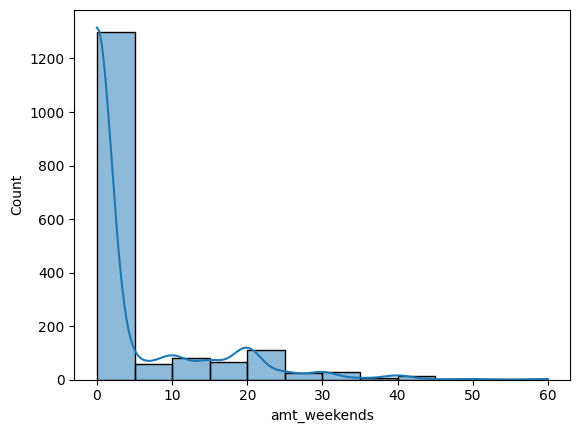

In [29]:
sns.histplot(data=df, x="amt_weekends", kde=True)

Let's visualize this only for smokers

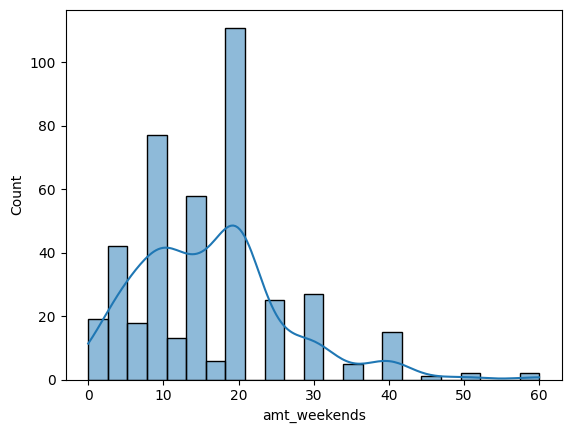

In [30]:
smoking_df = df[df['smoke'] == 'Yes']
sns.histplot(data=smoking_df, x='amt_weekends', kde=True)
plt.show()


#### 4.1.12 Amount Consumed over Weekdays

<AxesSubplot: xlabel='amt_weekdays', ylabel='Count'>

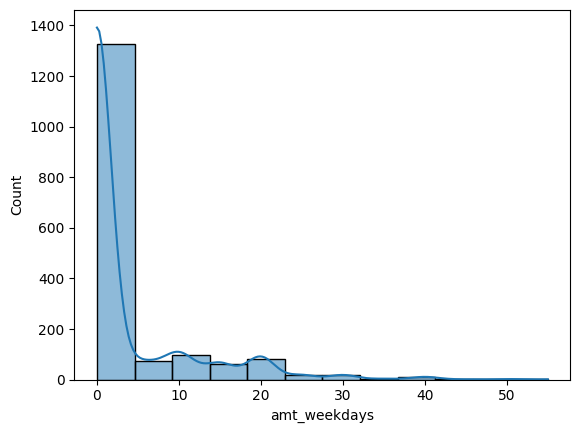

In [31]:
sns.histplot(data=df, x="amt_weekdays", kde=True)

Let's visualize this only for smokers

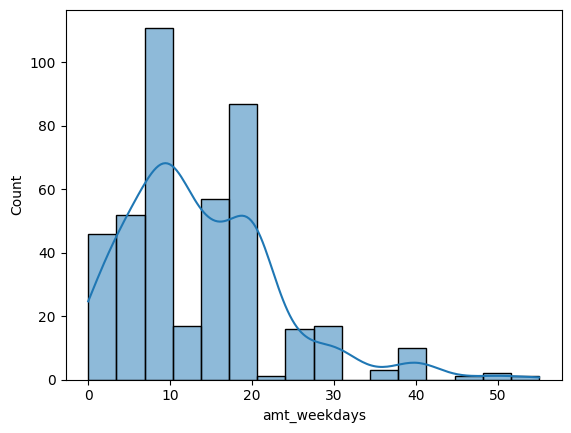

In [32]:
sns.histplot(data=smoking_df, x='amt_weekdays', kde=True)
plt.show()


### 4.2 Multivariate Analysis

#### 4.2.1 Columns Vs Smoke

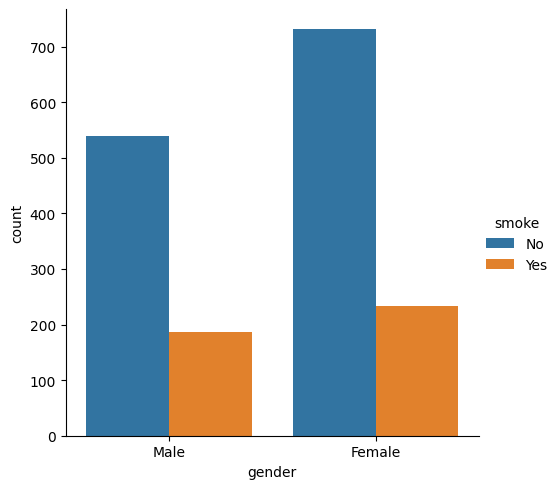

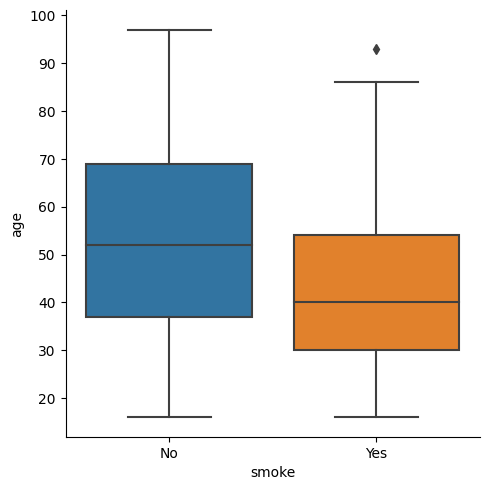

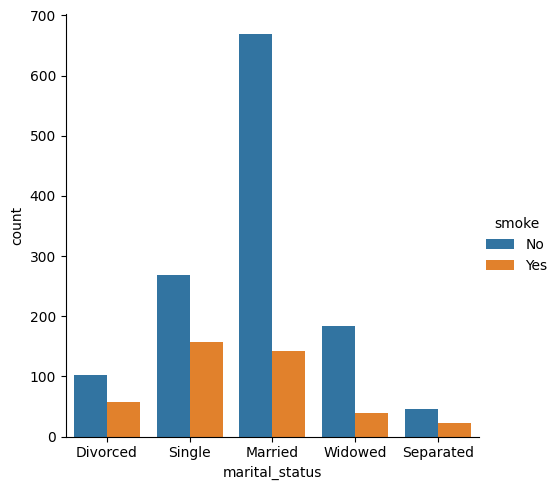

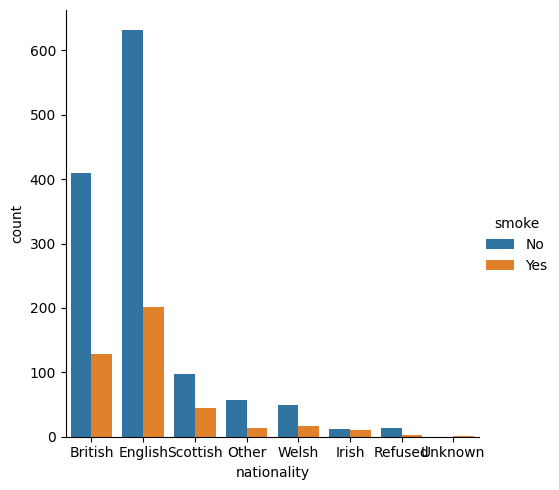

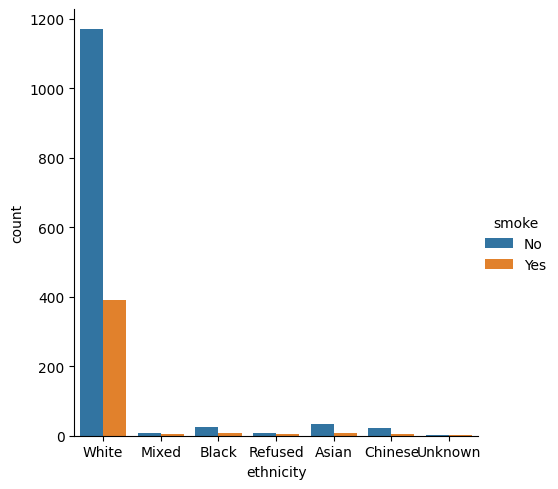

In [33]:
# plot gender against smoke
sns.catplot(x="gender", hue="smoke", kind="count", data=df)

# plot age against smoke
sns.catplot(x="smoke", y="age", kind="box", data=df)

# plot marital_status against smoke
sns.catplot(x="marital_status", hue="smoke", kind="count", data=df)

# plot nationality against smoke
sns.catplot(x="nationality", hue="smoke", kind="count", data=df)

# plot ethnicity against smoke
sns.catplot(x="ethnicity", hue="smoke", kind="count", data=df)

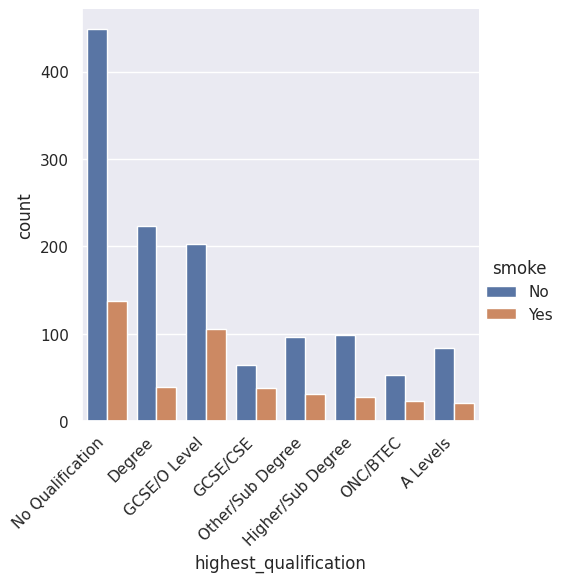

In [34]:
sns.set(style="darkgrid")

# plot highest_qualification against smoke with rotated xticks
ax = sns.catplot(x="highest_qualification", hue="smoke", kind="count", data=df)
ax.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

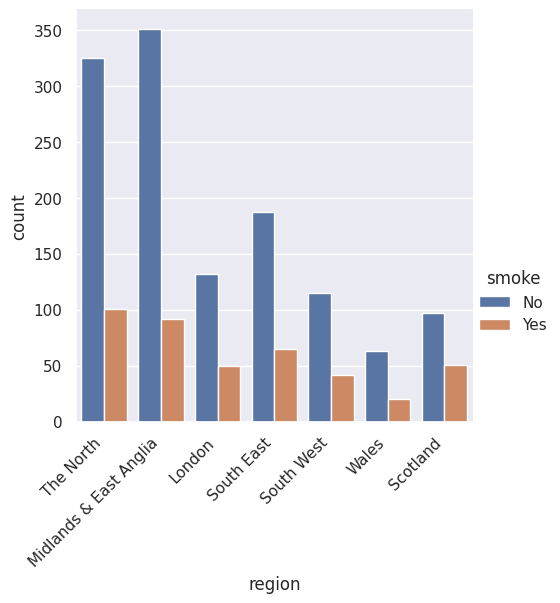

In [35]:
sns.set(style="darkgrid")

# plot highest_qualification against smoke with rotated xticks
ax = sns.catplot(x="region", hue="smoke", kind="count", data=df)
ax.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

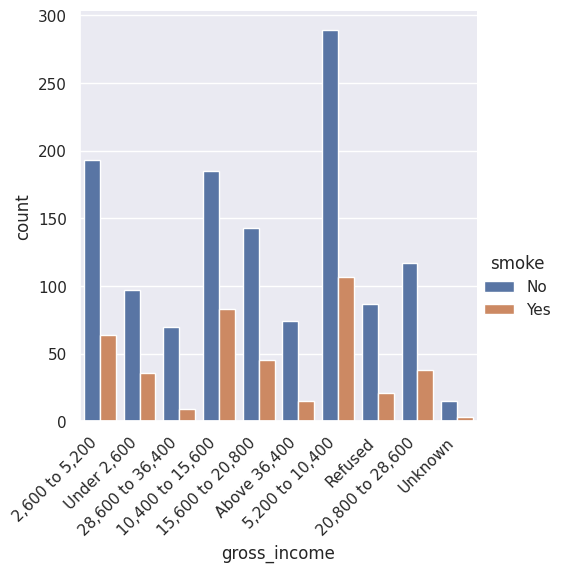

In [36]:
sns.set(style="darkgrid")

# plot highest_qualification against smoke with rotated xticks
ax = sns.catplot(x="gross_income", hue="smoke", kind="count", data=df)
ax.set_xticklabels(rotation=45, horizontalalignment='right')

plt.show()

## 5. Machine Learning : Binary Classification Smoker or Not?

In [37]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/1

In [38]:
from pycaret.utils import version
version()

'3.0.2'

In [39]:
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

#### Let's do Label Encoding for our categorical variables

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [41]:
df_smoke = df.loc[:, ['gender', 'age', 'marital_status', 'highest_qualification', 
                      'nationality', 'ethnicity', 'gross_income', 'region', 'smoke']]


In [42]:
df_smoke

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,1,38,0,5,0,6,2,5,0
1,0,42,3,5,0,6,8,5,1
2,1,40,1,1,1,6,4,5,0
3,0,40,1,1,1,6,0,5,0
4,0,39,1,3,0,6,2,5,0
...,...,...,...,...,...,...,...,...,...
1686,1,22,3,5,5,6,2,2,0
1687,0,49,0,7,1,6,2,2,1
1688,1,45,1,7,5,6,5,2,0
1689,0,51,1,5,1,6,2,2,1


In [43]:
smoke_counts = df_smoke['smoke'].value_counts()
print(smoke_counts)


0    1270
1     421
Name: smoke, dtype: int64


#### Fixing the imbalance

In [44]:
from imblearn.over_sampling import SMOTE
X = df_smoke.drop('smoke', axis=1) # features
y = df_smoke['smoke'] # target variable
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [45]:
y_resampled

0       0
1       1
2       0
3       0
4       0
       ..
2535    1
2536    1
2537    1
2538    1
2539    1
Name: smoke, Length: 2540, dtype: int64

In [46]:
y_resampled.value_counts()

0    1270
1    1270
Name: smoke, dtype: int64

In [47]:
X_resampled

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region
0,1,38,0,5,0,6,2,5
1,0,42,3,5,0,6,8,5
2,1,40,1,1,1,6,4,5
3,0,40,1,1,1,6,0,5
4,0,39,1,3,0,6,2,5
...,...,...,...,...,...,...,...,...
2535,0,61,1,4,1,6,1,4
2536,0,35,1,3,1,6,5,5
2537,0,53,0,5,7,5,5,6
2538,0,57,0,5,1,6,5,1


In [48]:
df_resampled = pd.concat([X_resampled, y_resampled], axis = 1)

In [49]:
df_resampled.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,1,38,0,5,0,6,2,5,0
1,0,42,3,5,0,6,8,5,1
2,1,40,1,1,1,6,4,5,0
3,0,40,1,1,1,6,0,5,0
4,0,39,1,3,0,6,2,5,0


### Binary Classification using Pycaret

#### Split the dataframe into train and test

In [50]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_resampled, test_size=0.2, random_state=42)


In [51]:
train.shape
train.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke'],
      dtype='object')

In [52]:
test.shape
test.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke'],
      dtype='object')

In [53]:
from pycaret.classification import *

In [54]:
exp_clf102 = setup(data = train, target = 'smoke', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  ) 

,Description,Value
0,Session id,123
1,Target,smoke
2,Target type,Binary
3,Original data shape,"(2032, 9)"
4,Transformed data shape,"(2032, 9)"
5,Transformed train set shape,"(1422, 9)"
6,Transformed test set shape,"(610, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [55]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7574,0.8323,0.7845,0.7500,0.7653,0.5145,0.5176,0.3990
catboost,CatBoost Classifier,0.7455,0.8178,0.7831,0.7336,0.7561,0.4904,0.4938,1.7650
xgboost,Extreme Gradient Boosting,0.7447,0.8302,0.7858,0.7323,0.7570,0.4888,0.4920,0.1780
lightgbm,Light Gradient Boosting Machine,0.7399,0.8210,0.7872,0.7251,0.7534,0.4790,0.4833,0.5000
et,Extra Trees Classifier,0.7300,0.8260,0.7539,0.7277,0.7384,0.4595,0.4627,0.3870
gbc,Gradient Boosting Classifier,0.7195,0.7804,0.7498,0.7110,0.7291,0.4386,0.4403,0.2530
dt,Decision Tree Classifier,0.7096,0.7102,0.7427,0.7034,0.7210,0.4185,0.4212,0.0810
ada,Ada Boost Classifier,0.6779,0.7443,0.6969,0.6767,0.6843,0.3556,0.3583,0.2220
knn,K Neighbors Classifier,0.6498,0.7159,0.7164,0.6370,0.6735,0.2986,0.3022,0.0920
qda,Quadratic Discriminant Analysis,0.6421,0.6767,0.6886,0.6366,0.6587,0.2834,0.2870,0.0800


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [56]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6993,0.7762,0.6528,0.7231,0.6861,0.3990,0.4009
1,0.7343,0.8278,0.8056,0.7073,0.7532,0.4680,0.4726
2,0.8592,0.9283,0.8592,0.8592,0.8592,0.7183,0.7183
3,0.7746,0.7945,0.7500,0.7941,0.7714,0.5496,0.5504
4,0.7887,0.8775,0.8056,0.7838,0.7945,0.5772,0.5774
5,0.7606,0.8345,0.8333,0.7317,0.7792,0.5201,0.5253
6,0.7324,0.8010,0.7361,0.7361,0.7361,0.4647,0.4647
7,0.7535,0.8419,0.8056,0.7342,0.7682,0.5063,0.5087
8,0.7183,0.8212,0.7222,0.7222,0.7222,0.4365,0.4365


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Visualize the Model

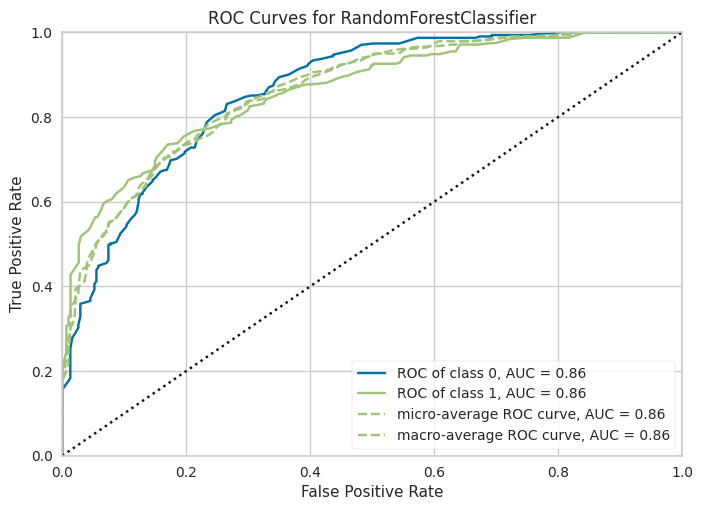

In [57]:
plot_model(model, plot = 'auc')

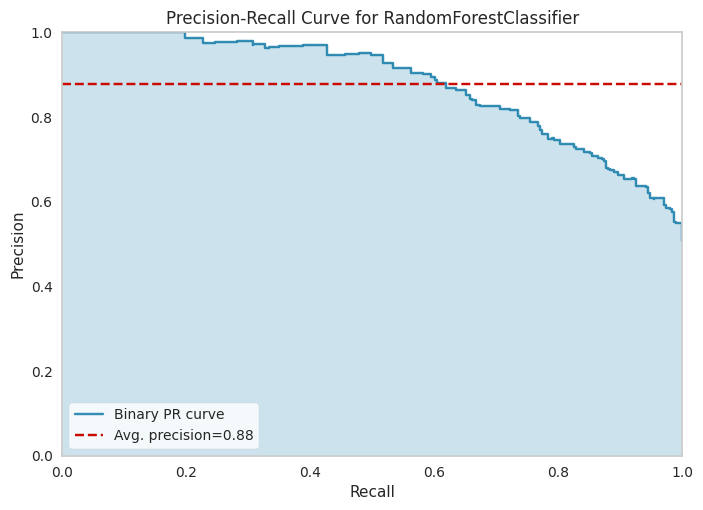

In [58]:
plot_model(model, plot = 'pr')

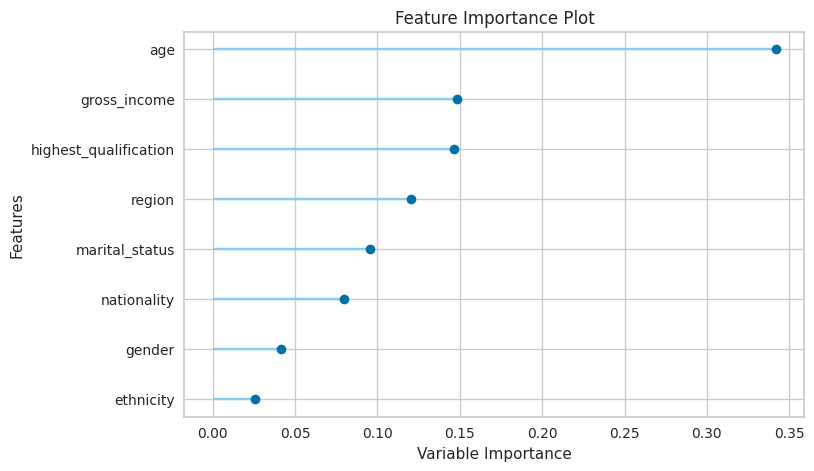

In [59]:
plot_model(model, plot='feature')

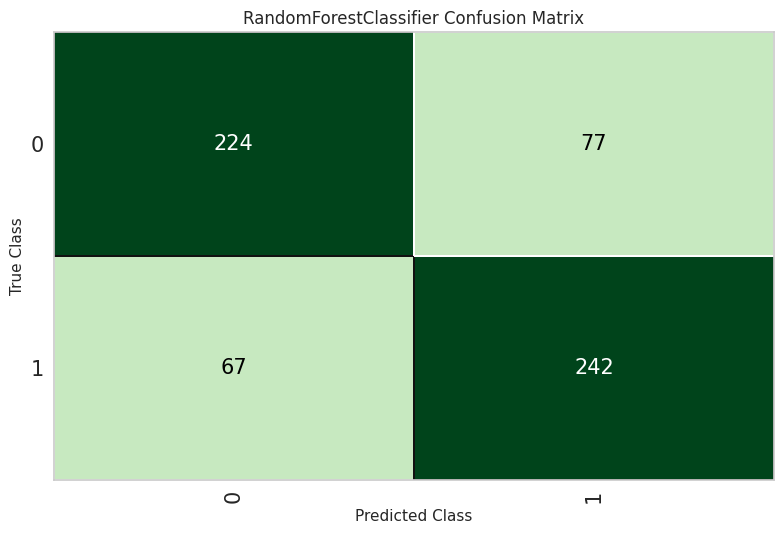

In [60]:
plot_model(model, plot = 'confusion_matrix')

### Finalize the model

In [61]:
final_rf = finalize_model(model)

In [62]:
final_rf

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'age', 'marital_status',
                                             'highest_qualification',
                                             'nationality', 'ethnicity',
                                             'gross_income', 'region'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [63]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9770,0.9955,0.9676,0.9868,0.9771,0.9541,0.9543


In [64]:
unseen_predictions = predict_model(final_rf, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7677,0.8381,0.8182,0.7279,0.7704,0.5370,0.5407


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,prediction_label,prediction_score
1557,0,42,1,1,0,6,0,2,0,0,0.64
134,1,43,0,5,0,6,0,5,1,0,0.85
1639,0,69,4,5,5,6,5,2,0,0,0.64
1498,0,25,1,6,0,0,5,6,0,0,0.70
1399,0,31,3,2,1,6,0,4,0,1,0.82


#### Best model for our Binary Classification model is XGBOOST. 

#### Accuracy ~ 77.76

### Model comparison without the synthetic data

In [65]:
df_smoke

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,1,38,0,5,0,6,2,5,0
1,0,42,3,5,0,6,8,5,1
2,1,40,1,1,1,6,4,5,0
3,0,40,1,1,1,6,0,5,0
4,0,39,1,3,0,6,2,5,0
...,...,...,...,...,...,...,...,...,...
1686,1,22,3,5,5,6,2,2,0
1687,0,49,0,7,1,6,2,2,1
1688,1,45,1,7,5,6,5,2,0
1689,0,51,1,5,1,6,2,2,1


In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_smoke, test_size=0.2, random_state=42)


In [67]:
from pycaret.classification import *

In [68]:
exp_clf102 = setup(data = train, target = 'smoke', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  ) 

,Description,Value
0,Session id,123
1,Target,smoke
2,Target type,Binary
3,Original data shape,"(1352, 9)"
4,Transformed data shape,"(1352, 9)"
5,Transformed train set shape,"(946, 9)"
6,Transformed test set shape,"(406, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [69]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7495,0.6264,0.2092,0.5102,0.2937,0.1734,0.2001,1.0460
nb,Naive Bayes,0.7484,0.6429,0.0420,0.4000,0.0741,0.0393,0.0738,0.1940
ada,Ada Boost Classifier,0.7484,0.6903,0.1714,0.4900,0.2496,0.1425,0.1708,0.6160
dummy,Dummy Classifier,0.7484,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2030
catboost,CatBoost Classifier,0.7474,0.6651,0.1931,0.4940,0.2749,0.1578,0.1839,1.2890
ridge,Ridge Classifier,0.7453,0.0000,0.0420,0.3600,0.0732,0.0326,0.0546,0.1750
gbc,Gradient Boosting Classifier,0.7410,0.6693,0.1884,0.4444,0.2600,0.1399,0.1574,0.6890
lr,Logistic Regression,0.7400,0.6468,0.0716,0.3363,0.1119,0.0467,0.0612,0.2390
lda,Linear Discriminant Analysis,0.7389,0.6483,0.0841,0.3434,0.1294,0.0547,0.0657,0.2080
qda,Quadratic Discriminant Analysis,0.7368,0.6340,0.2016,0.4522,0.2762,0.1441,0.1626,0.2090


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [70]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.6728,0.1250,0.4286,0.1935,0.0897,0.1142
1,0.7368,0.7066,0.2083,0.4545,0.2857,0.1509,0.1682
2,0.6947,0.5035,0.2083,0.3333,0.2564,0.0771,0.0804
3,0.7684,0.6121,0.2083,0.6250,0.3125,0.2131,0.2599
4,0.7263,0.5833,0.2083,0.4167,0.2778,0.1315,0.1435
5,0.8105,0.6863,0.2917,0.8750,0.4375,0.3562,0.4343
6,0.7234,0.5781,0.0870,0.2857,0.1333,0.0216,0.0271
7,0.7234,0.5410,0.1304,0.3333,0.1875,0.0578,0.0671
8,0.8085,0.6762,0.3750,0.7500,0.5000,0.3974,0.4340


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Visualize the model

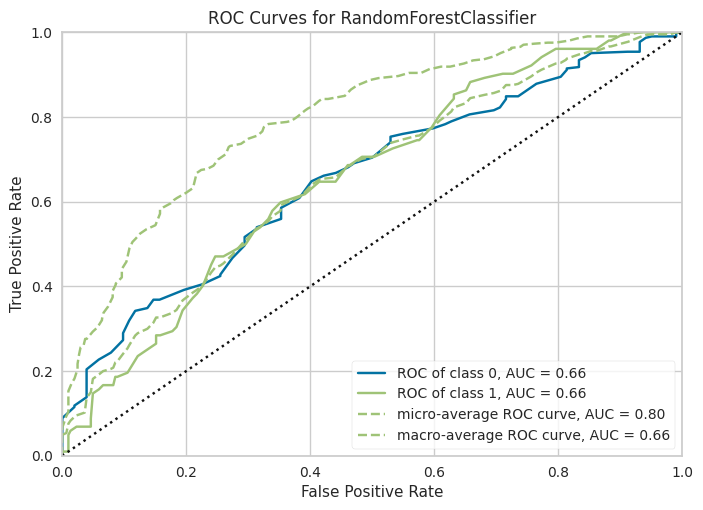

In [71]:
plot_model(model, plot = 'auc')

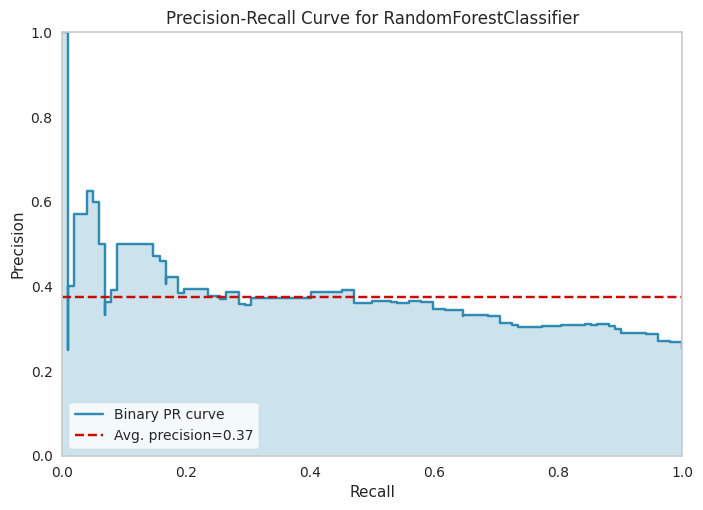

In [72]:
plot_model(model, plot = 'pr')

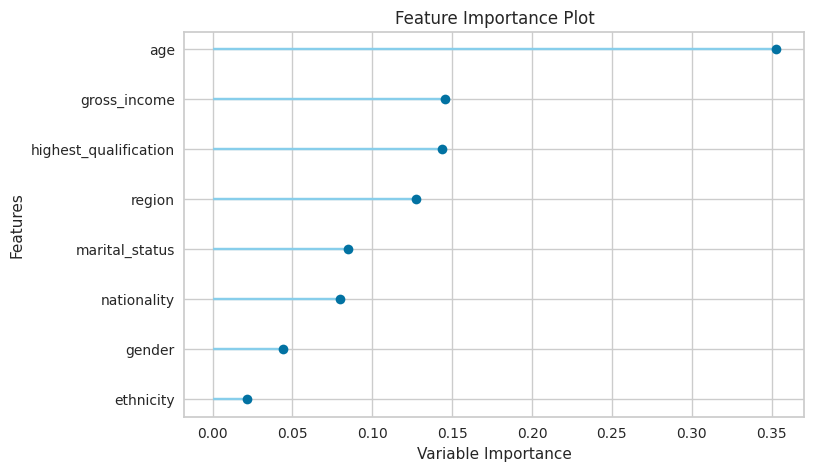

In [73]:
plot_model(model, plot='feature')

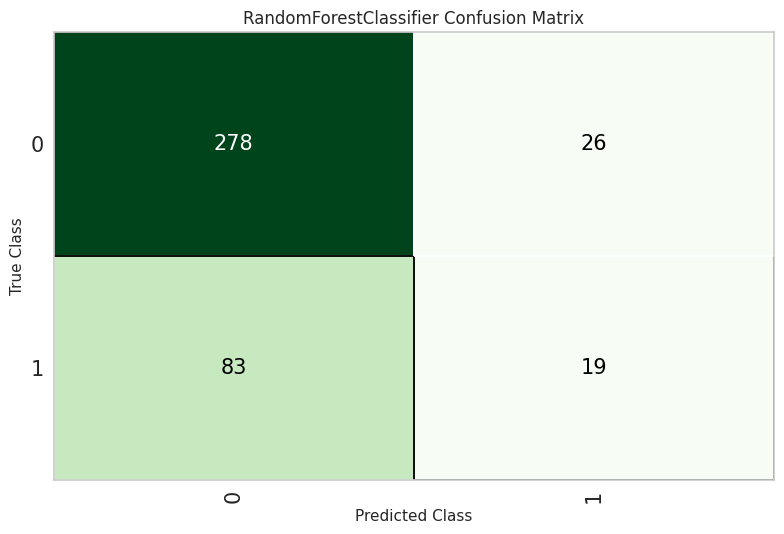

In [74]:
plot_model(model, plot = 'confusion_matrix')

### Finalize the model

In [75]:
final_rf = finalize_model(model)

In [76]:
final_rf

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'age', 'marital_status',
                                             'highest_qualification',
                                             'nationality', 'ethnicity',
                                             'gross_income', 'region'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [77]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9852,0.9980,0.9412,1.0000,0.9697,0.9599,0.9607


In [78]:
unseen_predictions = predict_model(final_rf, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7552,0.6305,0.1852,0.4688,0.2655,0.1505,0.1740


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,prediction_label,prediction_score
989,0,25,3,1,3,1,2,0,0,0,0.7200
1636,1,45,1,3,0,6,1,2,0,0,0.8400
1216,1,57,1,1,0,6,6,3,1,0,0.9350
1174,1,37,3,6,3,6,3,3,0,0,0.6200
1668,1,44,2,5,5,6,2,2,0,0,0.6233


#### RF is the best performing model with an accuracy of ~75%